--------------------------------------------------
As duas variáveis com maior correlação com o Preço são: 'Rooms' e 'Bedroom2'.
--------------------------------------------------

MÉTRICAS DE AVALIAÇÃO DO MODELO DE REGRESSÃO LINEAR
Coeficiente de Determinação (R²): 0.5567
Erro Absoluto Médio (MAE): 288,593.15
Erro Quadrático Médio (MSE): 178,837,081,658.98
Raiz do Erro Quadrático Médio (RMSE): 422,891.34



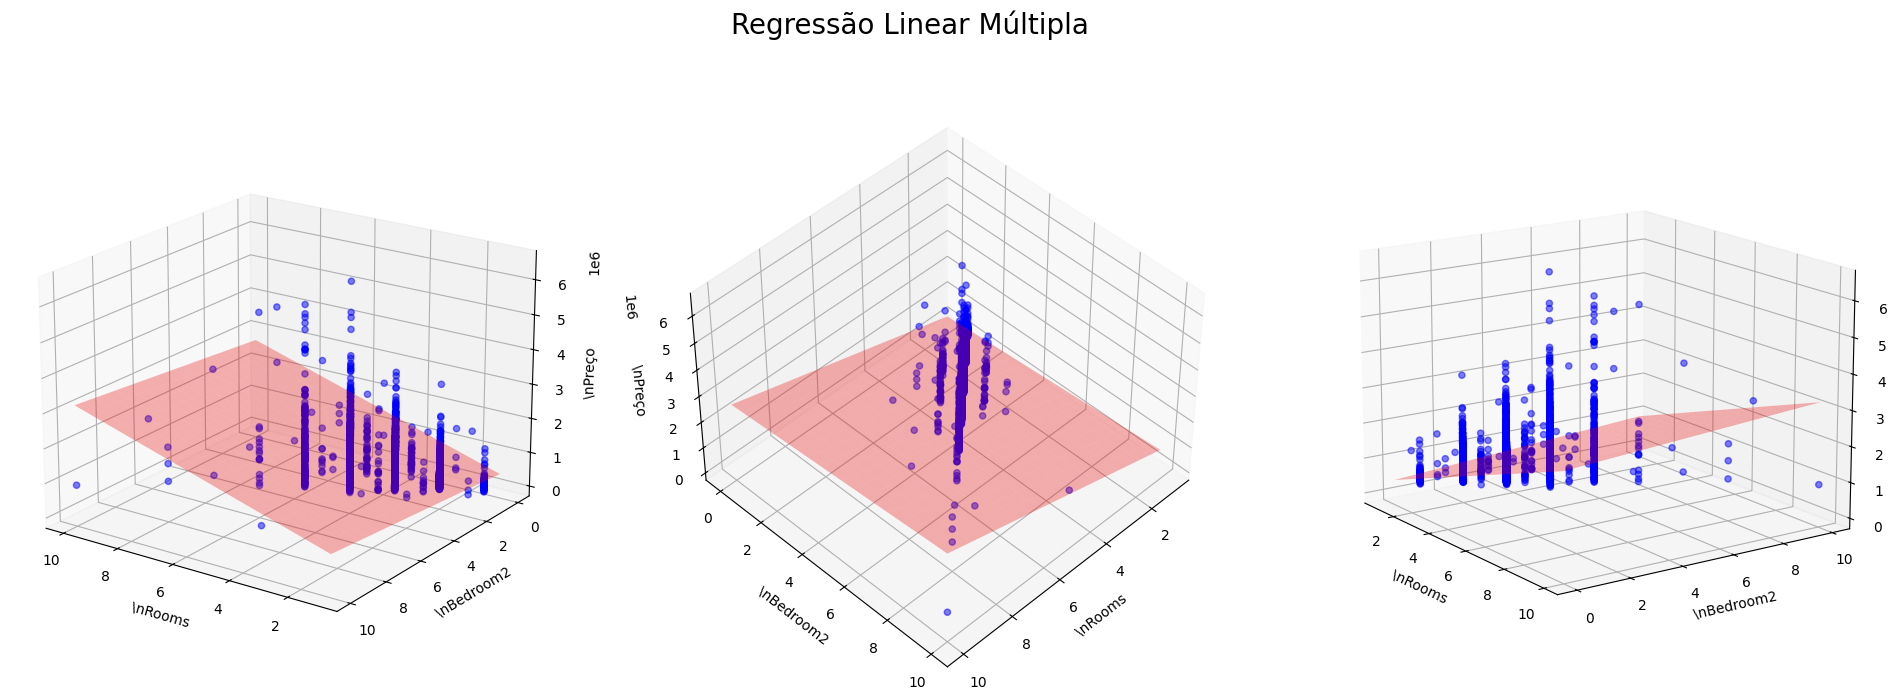

In [ ]:
# @title
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

try:
    df = pd.read_csv('/content/dataset.csv')
except FileNotFoundError:
    print("ERRO: 'dataset.csv' não encontrado.")
    exit()

# --- Pré-processamento ---
missing_threshold = 0.3
df_cleaned = df.dropna(thresh=len(df) * (1 - missing_threshold), axis=1)
df_cleaned = df_cleaned.dropna()
X = df_cleaned.drop(columns=['Price', 'Address', 'Suburb', 'SellerG', 'Date', 'Type', 'Method'])
y = df_cleaned['Price']
X = pd.get_dummies(X, drop_first=True)

# --- Análise de Correlação ---
temp_df = X.copy()
temp_df['Price'] = y
correlations = temp_df.corr()['Price'].abs().sort_values(ascending=False)
top_feature1 = correlations.index[1]
top_feature2 = correlations.index[2]
print("-" * 50)
print(f"As duas variáveis com maior correlação com o Preço são: '{top_feature1}' e '{top_feature2}'.")
print("-" * 50)

# --- Regressão Linear Múltipla (treinamento) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# --- Avaliação do modelo  ---
y_pred = linear_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n" + "=" * 50)
print("MÉTRICAS DE AVALIAÇÃO DO MODELO DE REGRESSÃO LINEAR")
print("=" * 50)
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Absoluto Médio (MAE): {mae:,.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:,.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:,.2f}")
print("=" * 50 + "\n")

fig, axes = plt.subplots(1, 3, figsize=(24, 8), subplot_kw={'projection': '3d'})
fig.suptitle('Regressão Linear Múltipla', fontsize=20)

perspectivas = [
    {'elev': 20, 'azim': 125, 'titulo': None},
    {'elev': 45, 'azim': 45, 'titulo': None},
    {'elev': 15, 'azim': -35, 'titulo': None}
]

for i, ax in enumerate(axes):

    # Plotar os pontos de dados reais
    ax.scatter(X_test[top_feature1], X_test[top_feature2], y_test, color='blue', alpha=0.5)

    x_surf = np.linspace(X_test[top_feature1].min(), X_test[top_feature1].max(), 20)
    y_surf = np.linspace(X_test[top_feature2].min(), X_test[top_feature2].max(), 20)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    X_grid = pd.DataFrame(np.array([x_surf.ravel(), y_surf.ravel()]).T, columns=[top_feature1, top_feature2])
    for col in X_train.columns:
        if col not in [top_feature1, top_feature2]:
            X_grid[col] = X_train[col].mean()
    X_grid = X_grid[X_train.columns]
    z_surf = linear_model.predict(X_grid).reshape(x_surf.shape)
    ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

    #------------------------------------
    ax.set_xlabel(f'\\n{top_feature1}', fontsize=10)
    ax.set_ylabel(f'\\n{top_feature2}', fontsize=10)
    ax.set_zlabel('\\nPreço', fontsize=10)
    ax.set_title(perspectivas[i]['titulo'], fontsize=14)
    ax.view_init(elev=perspectivas[i]['elev'], azim=perspectivas[i]['azim'])

plt.savefig('regressao_lin_mult.png', dpi=300, bbox_inches='tight')
plt.show()